In [7]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

ValueError: Variable learnable_dlatents already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/bademi/stylegan-encoder/encoder/generator_model.py", line 15, in create_variable_for_generator
    initializer=tf.initializers.random_normal())
  File "/home/bademi/stylegan-encoder/dnnlib/tflib/network.py", line 406, in <listcomp>
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]
  File "/home/bademi/stylegan-encoder/dnnlib/tflib/network.py", line 406, in run
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]


In [17]:
from encoder.generator_model import Generator 
from encoder.perceptual_model import PerceptualModel 
import tensorflow as tf 
  
images_in = tf.get_default_graph().get_tensor_by_name('D/images_in:0') 

In [23]:
images_in.op.inputs

In [14]:

new_discriminator = tflib.Network(
    'D2', num_channels=3, resolution=1024, 
    label_size=0, structure= 'fixed', 
    func_name='training.networks_stylegan.D_basic',
    input_template=tf.get_default_graph().get_tensor_by_name('G_synthesis_1/_Run/concat:0') 
)
new_discriminator.copy_vars_from(discriminator_network)


In [15]:
print(new_discriminator.input_templates)


[<tf.Tensor 'D2_3/images_in:0' shape=(?, 3, 1024, 1024) dtype=float32>, <tf.Tensor 'D2_3/labels_in:0' shape=(?, 0) dtype=float32>]


In [6]:
print(discriminator_network.input_shapes)
print(discriminator_network.output_shapes)
print(discriminator_network.input_templates)
print(discriminator_network.output_templates)
print(discriminator_network.run)
print(discriminator_network.input_names)
print(discriminator_network.static_kwargs)
      
print(discriminator_network.get_var('FromRGB_lod1/weight').shape)




[[None, 3, 1024, 1024], [None, 0]]
[[None, 1]]
[<tf.Tensor 'D/images_in:0' shape=(?, 3, 1024, 1024) dtype=float32>, <tf.Tensor 'D/labels_in:0' shape=(?, 0) dtype=float32>]
[<tf.Tensor 'D/scores_out:0' shape=(?, 1) dtype=float32>]
<bound method Network.run of <dnnlib.tflib.network.Network object at 0x7f2eac59ee80>>
['images_in', 'labels_in']
{'num_channels': 3, 'resolution': 1024, 'label_size': 0, 'blur_filter': [1, 2, 1]}
(1, 1, 3, 32)


In [ ]:
print(discriminator_network.var_global_to_local)

In [3]:
new_discriminator = tflib.Network(
    'D2', num_channels=3, resolution=1024, 
    label_size=0, structure= 'fixed', func_name='training.networks_stylegan.D_basic')


inside discriminator network
Tensor("D2/scores_out:0", shape=(?, 1), dtype=float32)


In [34]:
new_discriminator.copy_vars_from(discriminator_network)

In [21]:
from scipy.misc import imread, imsave, imresize
import numpy as np
image = np.array(imread('aligned_photos/arya_01.png'))
image = image.transpose(2,0,1) 
image = image[np.newaxis, :, :, :]
labels = np.zeros((1, 1))

/home/bademi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
print(list(range(10, 2, -1)))

[10, 9, 8, 7, 6, 5, 4, 3]


In [22]:
from training.networks_stylegan import D_basic
D_basic(image, labels)

inside discriminator network


AttributeError: 'numpy.ndarray' object has no attribute 'set_shape'

In [10]:
import tensorflow as tf
# Get operation by name and look at all the methods on the operation
op = tf.get_default_graph().get_operation_by_name("D/1024x1024/Conv1_down/LeakyReLU/Maximum")
op.outputs

[<tf.Tensor 'D/1024x1024/Conv1_down/LeakyReLU/Maximum:0' shape=(?, 32, 512, 512) dtype=float32>]

In [8]:
import tensorflow as tf
for op in tf.get_default_graph().get_operations():
    if op.name.startswith("D/") and "Conv" in op.name and "LeakyReLU" in op.name:
        print(op.name)

D/1024x1024/Conv0/LeakyReLU/alpha
D/1024x1024/Conv0/LeakyReLU/mul
D/1024x1024/Conv0/LeakyReLU/Maximum
D/1024x1024/Conv0/LeakyReLU/IdentityN
D/1024x1024/Conv1_down/LeakyReLU/alpha
D/1024x1024/Conv1_down/LeakyReLU/mul
D/1024x1024/Conv1_down/LeakyReLU/Maximum
D/1024x1024/Conv1_down/LeakyReLU/IdentityN
D/512x512/Conv0/LeakyReLU/alpha
D/512x512/Conv0/LeakyReLU/mul
D/512x512/Conv0/LeakyReLU/Maximum
D/512x512/Conv0/LeakyReLU/IdentityN
D/512x512/Conv1_down/LeakyReLU/alpha
D/512x512/Conv1_down/LeakyReLU/mul
D/512x512/Conv1_down/LeakyReLU/Maximum
D/512x512/Conv1_down/LeakyReLU/IdentityN
D/256x256/Conv0/LeakyReLU/alpha
D/256x256/Conv0/LeakyReLU/mul
D/256x256/Conv0/LeakyReLU/Maximum
D/256x256/Conv0/LeakyReLU/IdentityN
D/256x256/Conv1_down/LeakyReLU/alpha
D/256x256/Conv1_down/LeakyReLU/mul
D/256x256/Conv1_down/LeakyReLU/Maximum
D/256x256/Conv1_down/LeakyReLU/IdentityN
D/128x128/Conv0/LeakyReLU/alpha
D/128x128/Conv0/LeakyReLU/mul
D/128x128/Conv0/LeakyReLU/Maximum
D/128x128/Conv0/LeakyReLU/IdentityN


In [27]:
import tensorflow as tf
in_expr = [tf.get_default_graph().get_tensor_by_name(name) for name in ['D/images_in:0', 'D/labels_in:0']]
mb_in = [image.astype(float)]
print(dict(zip(in_expr, mb_in)))
expressions = ["D/1024x1024/Conv0/LeakyReLU/alpha:0", "D/1024x1024/Conv0/LeakyReLU/mul:0", 
               "D/1024x1024/Conv0/LeakyReLU/Maximum:0", "D/1024x1024/Conv0/LeakyReLU/IdentityN:0"]
output = tf.get_default_session().run(expressions, dict(zip(in_expr, mb_in)))

{<tf.Tensor 'D/images_in:0' shape=(?, 3, 1024, 1024) dtype=float32>: array([[[[36., 36., 36., ..., 41., 40., 40.],
         [38., 38., 38., ..., 41., 40., 40.],
         [38., 38., 38., ..., 41., 40., 40.],
         ...,
         [52., 53., 53., ...,  1.,  1.,  1.],
         [52., 53., 53., ...,  1.,  1.,  1.],
         [52., 52., 51., ...,  1.,  1.,  1.]],

        [[49., 49., 49., ..., 33., 32., 32.],
         [51., 51., 51., ..., 33., 32., 32.],
         [51., 51., 51., ..., 33., 32., 32.],
         ...,
         [65., 66., 66., ...,  1.,  1.,  1.],
         [65., 66., 66., ...,  1.,  1.,  1.],
         [65., 65., 64., ...,  1.,  1.,  1.]],

        [[55., 55., 55., ..., 30., 29., 29.],
         [57., 57., 57., ..., 30., 29., 29.],
         [57., 57., 57., ..., 30., 29., 29.],
         ...,
         [71., 72., 72., ...,  1.,  1.,  1.],
         [71., 72., 72., ...,  1.,  1.,  1.],
         [71., 71., 70., ...,  1.,  1.,  1.]]]])}


In [37]:
discriminator_intermediate_outputs = """D/1024x1024/Conv0/LeakyReLU/IdentityN
D/1024x1024/Conv1_down/LeakyReLU/IdentityN
D/512x512/Conv0/LeakyReLU/IdentityN
D/512x512/Conv1_down/LeakyReLU/IdentityN
D/256x256/Conv0/LeakyReLU/IdentityN
D/256x256/Conv1_down/LeakyReLU/IdentityN
D/128x128/Conv0/LeakyReLU/IdentityN
D/128x128/Conv1_down/LeakyReLU/IdentityN
D/64x64/Conv0/LeakyReLU/IdentityN
D/64x64/Conv1_down/LeakyReLU/IdentityN
D/32x32/Conv0/LeakyReLU/IdentityN
D/32x32/Conv1_down/LeakyReLU/IdentityN
D/16x16/Conv0/LeakyReLU/IdentityN
D/16x16/Conv1_down/LeakyReLU/IdentityN
D/8x8/Conv0/LeakyReLU/IdentityN
D/8x8/Conv1_down/LeakyReLU/IdentityN
D/4x4/Conv/LeakyReLU/IdentityN""".split("\n")

In [32]:
[print(x.shape) for x in output]
for i, x in enumerate(output):
    for j, y in enumerate(output):
        if np.array_equal(x, y):
            print("%d and %d are equal" % (i, j))

()
(1, 16, 1024, 1024)
(1, 16, 1024, 1024)
(1, 16, 1024, 1024)
0 and 0 are equal
1 and 1 are equal
2 and 2 are equal
2 and 3 are equal
3 and 2 are equal
3 and 3 are equal


In [33]:
output[3]

array([[[[ 1.71333618e+01,  2.33364506e+01,  2.30302372e+01, ...,
           3.38552933e+01,  3.31772957e+01,  2.70771217e+01],
         [ 5.30644512e+00,  1.85010684e+00,  2.08789706e+00, ...,
           9.03075695e-01,  6.93714738e-01,  9.23927021e+00],
         [ 4.36626482e+00,  3.82964611e-01,  6.46308541e-01, ...,
           6.78243160e-01,  6.93714738e-01,  9.23927021e+00],
         ...,
         [ 4.15522194e+00,  5.96330881e-01,  6.12804890e-01, ...,
          -1.81791035e-03, -1.81791035e-03, -5.35106175e-02],
         [ 3.84901071e+00, -5.81248961e-02, -1.55326948e-01, ...,
          -1.81791035e-03, -1.81791035e-03, -5.35106175e-02],
         [-4.19942904e+00, -5.62898588e+00, -5.70687819e+00, ...,
           3.94337505e-01,  3.94337505e-01,  1.32536173e-01]],

        [[-5.36395788e+00, -1.77712879e+01, -1.77318897e+01, ...,
          -1.18597536e+01, -1.14841738e+01, -1.23853626e+01],
         [ 5.03923531e+01, -5.60584426e-01, -6.31924331e-01, ...,
          -1.68828398e

In [ ]:
from typing import Any, List, Tuple, Union
def run(self,
        *in_arrays: Tuple[Union[np.ndarray, None], ...],
        input_transform: dict = None,
        output_transform: dict = None,
        return_as_list: bool = False,
        print_progress: bool = False,
        minibatch_size: int = None,
        num_gpus: int = 1,
        assume_frozen: bool = False,
        **dynamic_kwargs) -> Union[np.ndarray, Tuple[np.ndarray, ...], List[np.ndarray]]:
    """Run this network for the given NumPy array(s), and return the output(s) as NumPy array(s).
    Args:
        input_transform:    A dict specifying a custom transformation to be applied to the input tensor(s) before evaluating the network.
                            The dict must contain a 'func' field that points to a top-level function. The function is called with the input
                            TensorFlow expression(s) as positional arguments. Any remaining fields of the dict will be passed in as kwargs.
        output_transform:   A dict specifying a custom transformation to be applied to the output tensor(s) after evaluating the network.
                            The dict must contain a 'func' field that points to a top-level function. The function is called with the output
                            TensorFlow expression(s) as positional arguments. Any remaining fields of the dict will be passed in as kwargs.
        return_as_list:     True = return a list of NumPy arrays, False = return a single NumPy array, or a tuple if there are multiple outputs.
        print_progress:     Print progress to the console? Useful for very large input arrays.
        minibatch_size:     Maximum minibatch size to use, None = disable batching.
        num_gpus:           Number of GPUs to use.
        assume_frozen:      Improve multi-GPU performance by assuming that the trainable parameters will remain changed between calls.
        dynamic_kwargs:     Additional keyword arguments to be passed into the network build function.
    """
    print("HELLO!")
    print("YAYAYAYAYAYA!")
    assert len(in_arrays) == self.num_inputs
    assert not all(arr is None for arr in in_arrays)
    assert input_transform is None or util.is_top_level_function(input_transform["func"])
    assert output_transform is None or util.is_top_level_function(output_transform["func"])
    output_transform, dynamic_kwargs = _handle_legacy_output_transforms(output_transform, dynamic_kwargs)
    num_items = in_arrays[0].shape[0]
    if minibatch_size is None:
        minibatch_size = num_items

    # Construct unique hash key from all arguments that affect the TensorFlow graph.
    key = dict(input_transform=input_transform, output_transform=output_transform, num_gpus=num_gpus, assume_frozen=assume_frozen, dynamic_kwargs=dynamic_kwargs)
    def unwind_key(obj):
        if isinstance(obj, dict):
            return [(key, unwind_key(value)) for key, value in sorted(obj.items())]
        if callable(obj):
            return util.get_top_level_function_name(obj)
        return obj
    key = repr(unwind_key(key))

    print(self._run_cache.items())
    print(key)
    self._run_cache.clear()
    # Build graph.
    if key not in self._run_cache:
        with tfutil.absolute_name_scope(self.scope + "/_Run"), tf.control_dependencies(None):
            with tf.device("/cpu:0"):
                in_expr = [tf.placeholder(tf.float32, name=name) for name in self.input_names]
                in_split = list(zip(*[tf.split(x, num_gpus) for x in in_expr]))
                print("in_expr = ")
                print(in_expr)
                print("in_split = ")
                print(in_split)

            out_split = []
            for gpu in range(num_gpus):
                with tf.device("/gpu:%d" % gpu):
                    net_gpu = self.clone() if assume_frozen else self
                    in_gpu = in_split[gpu]

                    if input_transform is not None:
                        in_kwargs = dict(input_transform)
                        in_gpu = in_kwargs.pop("func")(*in_gpu, **in_kwargs)
                        in_gpu = [in_gpu] if tfutil.is_tf_expression(in_gpu) else list(in_gpu)

                    assert len(in_gpu) == self.num_inputs
                    print(in_gpu)
                    out_gpu = net_gpu.get_output_for(*in_gpu, return_as_list=True, **dynamic_kwargs)

                    if output_transform is not None:
                        out_kwargs = dict(output_transform)
                        out_gpu = out_kwargs.pop("func")(*out_gpu, **out_kwargs)
                        out_gpu = [out_gpu] if tfutil.is_tf_expression(out_gpu) else list(out_gpu)

                    assert len(out_gpu) == self.num_outputs
                    out_split.append(out_gpu)

            with tf.device("/cpu:0"):
                out_expr = [tf.concat(outputs, axis=0) for outputs in zip(*out_split)]
                self._run_cache[key] = in_expr, out_expr

    # Run minibatches.
    in_expr, out_expr = self._run_cache[key]
    out_arrays = [np.empty([num_items] + tfutil.shape_to_list(expr.shape)[1:], expr.dtype.name) for expr in out_expr]
    print("out_expr")
    print(out_expr)
    for mb_begin in range(0, num_items, minibatch_size):
        if print_progress:
            print("\r%d / %d" % (mb_begin, num_items), end="")

        mb_end = min(mb_begin + minibatch_size, num_items)
        mb_num = mb_end - mb_begin
        mb_in = [src[mb_begin : mb_end] if src is not None else np.zeros([mb_num] + shape[1:]) for src, shape in zip(in_arrays, self.input_shapes)]
        print("in_expr")
        print(in_expr)
        print("mb_in")
        print(mb_in)
        mb_out = tf.get_default_session().run(out_expr, dict(zip(in_expr, mb_in)))
        print("mb out = ")
        print(mb_out)
        for dst, src in zip(out_arrays, mb_out):
            dst[mb_begin: mb_end] = src

    # Done.
    if print_progress:
        print("\r%d / %d" % (num_items, num_items))

    if not return_as_list:
        out_arrays = out_arrays[0] if len(out_arrays) == 1 else tuple(out_arrays)
    return out_arrays


In [ ]:
import types
import inspect
import re
import uuid
import sys
import numpy as np
import tensorflow as tf

from collections import OrderedDict
from typing import Any, List, Tuple, Union

from dnnlib.tflib import tfutil
from dnnlib import util

from dnnlib.tflib import TfExpression, TfExpressionEx
_print_legacy_warning = True

def _handle_legacy_output_transforms(output_transform, dynamic_kwargs):
    global _print_legacy_warning
    legacy_kwargs = ["out_mul", "out_add", "out_shrink", "out_dtype"]
    if not any(kwarg in dynamic_kwargs for kwarg in legacy_kwargs):
        return output_transform, dynamic_kwargs

    if _print_legacy_warning:
        _print_legacy_warning = False
        print()
        print("WARNING: Old-style output transformations in Network.run() are deprecated.")
        print("Consider using 'output_transform=dict(func=tflib.convert_images_to_uint8)'")
        print("instead of 'out_mul=127.5, out_add=127.5, out_dtype=np.uint8'.")
        print()
    assert output_transform is None

    new_kwargs = dict(dynamic_kwargs)
    new_transform = {kwarg: new_kwargs.pop(kwarg) for kwarg in legacy_kwargs if kwarg in dynamic_kwargs}
    new_transform["func"] = _legacy_output_transform_func
    return new_transform, new_kwargs

def _legacy_output_transform_func(*expr, out_mul=1.0, out_add=0.0, out_shrink=1, out_dtype=None):
    if out_mul != 1.0:
        expr = [x * out_mul for x in expr]

    if out_add != 0.0:
        expr = [x + out_add for x in expr]

    if out_shrink > 1:
        ksize = [1, 1, out_shrink, out_shrink]
        expr = [tf.nn.avg_pool(x, ksize=ksize, strides=ksize, padding="VALID", data_format="NCHW") for x in expr]

    if out_dtype is not None:
        if tf.as_dtype(out_dtype).is_integer:
            expr = [tf.round(x) for x in expr]
        expr = [tf.saturate_cast(x, out_dtype) for x in expr]
    return expr

In [7]:
import types
from scipy.misc import imread, imsave, imresize
image = np.array(imread('aligned_photos/arya_01.png'))
print(discriminator_network.name)
print(discriminator_network.num_inputs)
print(image.shape)
image = image.transpose(2,0,1) 
print(image.shape)
image = image[np.newaxis, :, :, :]
print(image.shape)
print(discriminator_network.run(image, None))
print(new_discriminator.run(image, None))


/home/bademi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


D
2
(1024, 1024, 3)
(3, 1024, 1024)
(1, 3, 1024, 1024)
[[-13.600558]]


NameError: name 'new_discriminator' is not defined

In [ ]:
discriminator_network.run(image, None)

new_discriminator.run(image, None)


In [8]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((1024, 1024))

def move_and_show(latent_vector, directions, coeffs, desc):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    captions = ['Less %s' %desc , 'Input image', 'More %s' %desc]
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        for direction in directions:
            new_latent_vector[:8] = (new_latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title(captions[i])
    [x.axis('off') for x in ax]
    plt.show()

In [ ]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')
# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

In [ ]:
facemakeup_direction = np.load('facemakeup_direction.npy')


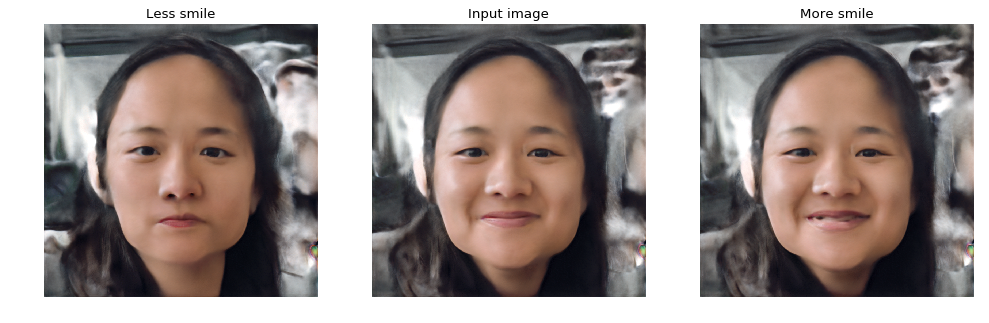

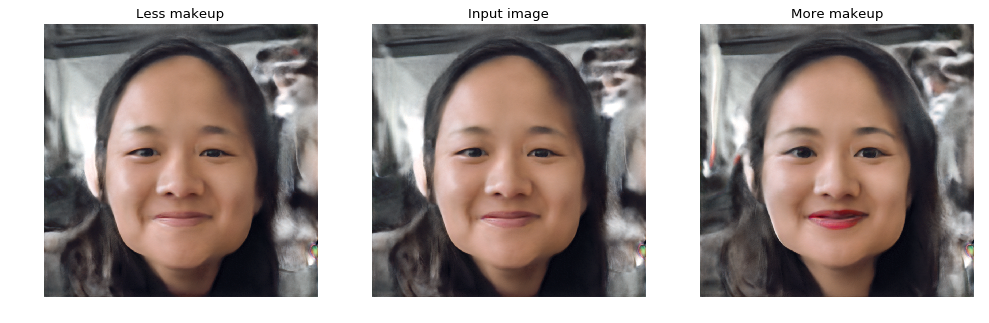

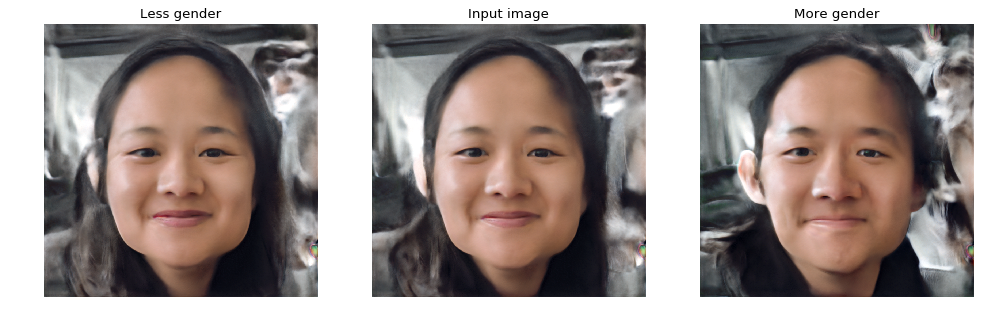

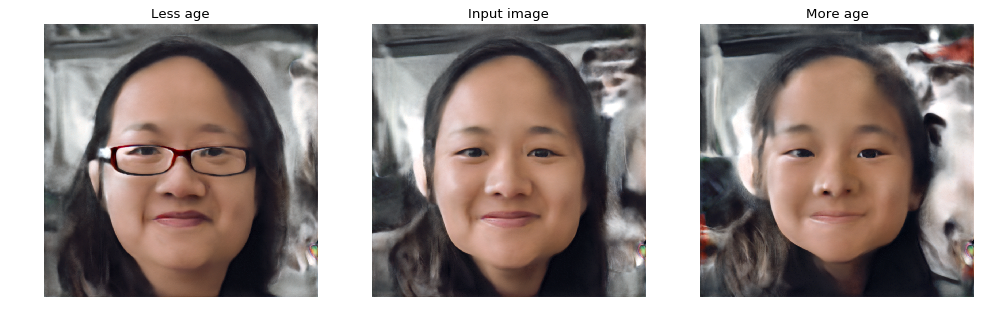

In [ ]:
#rnd = np.random.RandomState(829) # ,1723,
#latents = rnd.randn(1, Gs_network.input_shape[1])
#print(latents.shape)
#dlatents = Gs_network.components.mapping.run(latents, None)
#print(dlatents.shape)
#src_images = Gs_network.components.synthesis.run(dlatents, randomize_noise=False)
dlatents = np.load('latent_representations/steph_01.npy')
move_and_show(dlatents, [smile_direction], [-1, 0, 0.3], "smile")
move_and_show(dlatents, [facemakeup_direction], [-1, 0, 3], "makeup")
move_and_show(dlatents, [gender_direction], [-0.5, 0, 1], "gender")
move_and_show(dlatents, [age_direction], [-2, 0, 1.5], "age")



In [ ]:
import caffe
model = '/home/bademi/stylegan-encoder/AFFACT.prototxt';
weights = 'AFFACT.caffemodelAFFACT.caffemodel';

caffe.set_mode_gpu();
caffe.set_device(0);

net = caffe.Net('/home/bademi/stylegan-encoder/AFFACT.prototxt', '/home/bademi/stylegan-encoder/AFFACT-S.caffemodel.h5', caffe.TEST)
import numpy as np
from scipy.misc import imread, imsave, imresize

image = np.array(imread('girl.png'));
im_input = image[np.newaxis, np.newaxis, :, :]

net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

output = net.forward()
print(output)



In [ ]:
%%time
batch_size = 128
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=8)

all_latents = []
all_dlatents = []
all_results = []
for seed in range(1):
    # Generate batch_size images
    latents = np.random.RandomState(seed).randn(batch_size, Gs_network.input_shape[1])
    dlatents = Gs_network.components.mapping.run(latents, None)
    #images = Gs_network.components.synthesis.run(dlatents, truncation_psi=1,randomize_noise=False,**synthesis_kwargs)
    images = Gs_network.run(latents, None, **synthesis_kwargs) # [seed, y, x, rgb]
    #fig,ax = plt.subplots(int(len(images)/2), 2, figsize=(15, 200), dpi=80)

    results = []
    for i,image in enumerate(images):
        image_from_array = PIL.Image.fromarray(image, 'RGB')
        scaled_down_image = image_from_array.resize((224, 224))
        array_from_image = np.array(scaled_down_image)
        transposed_image = array_from_image.transpose(2,0,1)
        input_image = transposed_image[np.newaxis, :, :, :]
        net.blobs['data'].data[...] = input_image
        res = net.forward();
        all_latents.append(latents[i])
        all_dlatents.append(dlatents[i])
        all_results.append(res['attributes'][0])
        #ax[int(i/2)][i%2].imshow(image_from_array)
    np.save('batch_%s.npy' % seed, np.array(results))
    print(".")


In [ ]:
training_data = np.array([all_latents, all_dlatents, all_results])
np.save('test_training_data.npy', training_data, allow_pickle=True)

In [ ]:
saved_training_data = np.load('test_training_data.npy', allow_pickle=True)
saved_training_data.shape

In [ ]:
from scipy.stats import logistic

for i in range(40):
    print(np.sum(logistic.cdf(saved_training_data[2][:,i])))

In [ ]:

res = net.forward({image});
#prob = res{1};


In [ ]:
saved_training_data[2].shape

In [ ]:
print(net.blobs['data'].shape)

In [ ]:
from scipy.misc import imread, imsave, imresize
import PIL.Image

PIL.Image.fromarray(imread('girl.png'), 'RGB')

In [ ]:
import caffe
from scipy.misc import imread, imsave, imresize
import numpy as np

model = '/home/bademi/stylegan-encoder/AFFACT.prototxt';
weights = 'AFFACT.caffemodelAFFACT.caffemodel';
caffe.set_mode_gpu();
caffe.set_device(0);
net = caffe.Net('/home/bademi/stylegan-encoder/AFFACT.prototxt', '/home/bademi/stylegan-encoder/AFFACT-S.caffemodel.h5', caffe.TEST)




In [ ]:

image = np.array(imread('girl.png'));
image = image.transpose(2,0,1)
im_input = image[np.newaxis, :, :, :]
print(im_input.shape)
net.blobs['data'].data[...] = im_input

output = net.forward()
print(output)

In [ ]:
attributes = '''5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young'''.split('\n')[21]
attributes

In [ ]:
from scipy.stats import logistic

for a,b in zip(logistic.cdf(output['attributes'][0]), attributes):
    print(a,b)


In [ ]:
print(attributes)

In [ ]:
output['attributes']

In [ ]:
batch_size = 32
seed = 345
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=8)

# Generate batch_size images
latents = np.random.RandomState(seed).randn(batch_size, Gs_network.input_shape[1])
dlatents = Gs_network.components.mapping.run(latents, None)
#images = Gs_network.components.synthesis.run(dlatents, truncation_psi=1,randomize_noise=False,**synthesis_kwargs)
images = Gs_network.run(latents, None, **synthesis_kwargs) # [seed, y, x, rgb]

fig,ax = plt.subplots(int(len(images)/2), 2, figsize=(15, 200), dpi=80)

results = []
for i,image in enumerate(images):
    image_from_array = PIL.Image.fromarray(image, 'RGB')
    scaled_down_image = image_from_array.resize((224, 224))
    array_from_image = np.array(scaled_down_image)
    transposed_image = array_from_image.transpose(2,0,1)
    input_image = transposed_image[np.newaxis, :, :, :]
    net.blobs['data'].data[...] = input_image
    res = net.forward();
    results.append([latents[i], dlatents[i], res['attributes'][0]])
    ax[int(i/2)][i%2].imshow(image_from_array)
    print(res)
plt.show()
